In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
from scipy.stats import pearsonr

In [2]:
# load datasets
employName = "LabourForce.xls"
eduName = "SecondaryEnrol.xls"
wageName = "WageGenderGap.xls"
birthrateName = "birthrate.xls"
employ = pd.read_excel(employName)
edu = pd.read_excel(eduName)
wage = pd.read_excel(wageName)
birthrate = pd.read_excel(birthrateName)

In [3]:
# datasets eda
employ.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,"Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,"Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,42.735001,43.327999,44.117001,45.039001,46.016998,47.000999,47.765999,48.473999,48.660000,48.848999
2,Angola,AGO,"Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,75.306999,75.344002,75.389000,75.432999,75.464996,75.478996,75.470001,75.450996,75.412003,75.372002
3,Albania,ALB,"Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,45.693001,47.104000,48.806000,44.650002,44.789001,47.675999,47.459000,47.312000,47.191002,47.081001
4,Andorra,AND,"Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
edu.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,"School enrollment, secondary, female (% gross)",SE.SEC.ENRR.FE,NaN,NaN,NaN,NaN,NaN,NaN,...,98.29424,99.73133,112.14580,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,"School enrollment, secondary, female (% gross)",SE.SEC.ENRR.FE,NaN,NaN,NaN,NaN,NaN,NaN,...,33.30268,36.63596,38.10794,37.84849,37.33299,37.41269,37.04580,38.76029,NaN,NaN
2,Angola,AGO,"School enrollment, secondary, female (% gross)",SE.SEC.ENRR.FE,NaN,NaN,NaN,NaN,NaN,NaN,...,21.26446,20.72070,NaN,NaN,NaN,NaN,39.74183,NaN,NaN,NaN
3,Albania,ALB,"School enrollment, secondary, female (% gross)",SE.SEC.ENRR.FE,NaN,NaN,NaN,NaN,NaN,NaN,...,88.35548,89.39914,91.11264,94.19866,94.78689,95.12266,94.23857,94.71290,95.70465,NaN
4,Andorra,AND,"School enrollment, secondary, female (% gross)",SE.SEC.ENRR.FE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
wage.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,"Wage and salaried workers, female (% of female...",SL.EMP.WORK.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,"Wage and salaried workers, female (% of female...",SL.EMP.WORK.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.405000,3.493000,3.599000,3.724000,3.844000,3.963000,4.077000,4.194000,4.282000,4.371
2,Angola,AGO,"Wage and salaried workers, female (% of female...",SL.EMP.WORK.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,17.354000,16.502001,16.610001,16.686001,16.648001,16.620001,16.731001,16.754000,16.808001,16.879
3,Albania,ALB,"Wage and salaried workers, female (% of female...",SL.EMP.WORK.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,36.946999,34.728001,32.007000,37.118000,40.764999,42.541000,43.131001,43.740002,44.320999,44.902
4,Andorra,AND,"Wage and salaried workers, female (% of female...",SL.EMP.WORK.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
eduUS = edu.loc[edu['Country Name'] == "United States"]
eduCN = edu.loc[edu['Country Name'] == "China"]
eduIND = edu.loc[edu['Country Name'] == "India"]

In [7]:
eduframes = [eduUS,eduCN, eduIND]

In [8]:
eduNEW = pd.concat(eduframes)

In [9]:
eduNEW.set_index("Country Name", inplace = True)

In [10]:
eduNEW.head()

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country Name,,,,,,,,,,,,,,,,,,,,,
United States,USA,"School enrollment, secondary, female (% gross)",SE.SEC.ENRR.FE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,95.40690,96.21579,96.50358,96.30906,97.51305,98.17358,98.47471,98.69556,NaN,NaN
China,CHN,"School enrollment, secondary, female (% gross)",SE.SEC.ENRR.FE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,88.01268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
India,IND,"School enrollment, secondary, female (% gross)",SE.SEC.ENRR.FE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,61.10480,64.66925,67.63686,69.48177,75.03926,74.68529,76.03895,74.05851,NaN,NaN


In [11]:
eduNEW = eduNEW.drop(['Country Code','Indicator Name','Indicator Code'],axis=1)

In [12]:
#Similar data preprocessing applied on the employment data
employUS = employ.loc[employ['Country Name'] == "United States"]
employCN = employ.loc[employ['Country Name'] == "China"]
employIND = employ.loc[employ['Country Name'] == "India"]
employframes = [employUS,employCN,employIND]
employNEW = pd.concat(employframes)
employNEW.set_index("Country Name", inplace = True)
employNEW =employNEW.drop(['Country Code','Indicator Name','Indicator Code'],axis=1)

In [13]:
employNEW.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country Name,,,,,,,,,,,,,,,,,,,,,
United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,57.501999,56.930,56.701000,56.292000,56.111000,55.834000,55.993999,56.313000,56.047001,55.778000
China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,63.777000,63.570,63.401001,63.178001,62.926998,62.606998,62.230000,61.844002,61.257000,60.637001
India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.829000,24.389,23.018000,23.186001,23.350000,23.500999,23.657000,23.796000,23.605000,23.413000


In [14]:
#Similar data preprocessing applied on the employment data
wageUS = wage.loc[employ['Country Name'] == "United States"]
wageCN = wage.loc[employ['Country Name'] == "China"]
wageIND = wage.loc[employ['Country Name'] == "India"]
wageframes = [wageUS,wageCN,wageIND]
wageNEW = pd.concat(wageframes)
wageNEW.set_index("Country Name", inplace = True)
wageNEW = wageNEW.drop(['Country Code','Indicator Name','Indicator Code'],axis=1)

In [15]:
wageNEW.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country Name,,,,,,,,,,,,,,,,,,,,,
United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,94.417999,94.501999,94.411003,94.430,94.636002,94.740997,94.841003,94.723000,94.778,94.832001
China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45.289001,46.202999,47.007999,47.777,48.536999,49.203999,49.903000,50.630001,51.320,51.977001
India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.463000,14.495000,16.753000,17.104,17.506001,17.941999,18.346001,18.773001,19.216,19.657000


In [16]:
birthUS = birthrate.loc[birthrate['Country Name'] == "United States"]
birthCN = birthrate.loc[birthrate['Country Name'] == "China"]
birthIND = birthrate.loc[birthrate['Country Name'] == "India"]
birthframes = [birthUS,birthCN,birthIND]
birthNEW = pd.concat(birthframes)
birthNEW.set_index("Country Name", inplace = True)
birthNEW = birthNEW.drop(['Country Code','Indicator Name','Indicator Code'],axis=1)
birthNEW.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country Name,,,,,,,,,,,,,,,,,,,,,
United States,23.700,23.300,22.400,21.70,21.100,19.400,18.400,17.800,17.600,17.900,...,13.000,12.700,12.600,12.400,12.500,12.400,12.200,11.800,NaN,NaN
China,20.860,18.020,37.010,43.37,39.140,37.880,35.050,33.960,35.590,34.110,...,11.900,11.930,12.100,12.080,12.370,12.070,12.950,12.430,NaN,NaN
India,41.995,41.749,41.484,41.20,40.898,40.587,40.274,39.968,39.672,39.388,...,21.114,20.495,19.923,19.416,18.984,18.625,18.332,18.083,NaN,NaN


In [17]:
eduNEW = eduNEW.fillna(0).T
employNEW = employNEW.fillna(0).T
wageNEW = wageNEW.fillna(0).T
birthNEW = birthNEW.fillna(0).T


In [27]:
femaleData = pd.DataFrame()
femaleData['eduUS'] = eduNEW['United States']
femaleData['eduCN'] = eduNEW['China']
femaleData['eduIND'] = eduNEW['India']
femaleData['wageUS'] = wageNEW['United States']
femaleData['wageCN'] = wageNEW['China']
femaleData['wageIND'] = wageNEW['India']
femaleData['birthUS'] = birthNEW['United States']
femaleData['birthCN'] = birthNEW['China']
femaleData['birthIND'] = birthNEW['India']
femaleData.reset_index(level=0, inplace=True)
femaleData.rename(columns={'index':'year'}, inplace=True)


In [19]:
eduNEW.to_excel("eduNEW.xls")
employNEW.to_excel("employNEW.xls")
wageNEW.to_excel("wageNEW.xls")

In [20]:
femaleData.to_excel("femaleData.xls")

In [21]:
def line_bar(x,y,y1,titleText):
    # define colors
    colors=[]
    for i in y:
        if i >= 0:
            colors.append( 'green')
        else:
            colors.append( 'red')
            
    # plot bar and line        
    fig = plt.figure()
    ax = fig.gca() 
    ax.bar(x, y, align='center', alpha=0.5,color=colors)   
    ax.plot(x, y1)
    
    ax.title.set_text(titleText)
    plt.show()
    


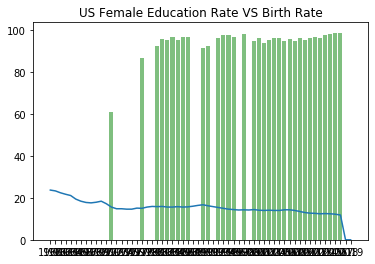

In [22]:
year=femaleData['year']
y_US=femaleData['eduUS']  
y1_US=femaleData['birthUS']
#y2_US=femaleData['wageUS']
titleText = ("US Female Education Rate VS Birth Rate")
line_bar(year,y_US,y1_US,titleText)



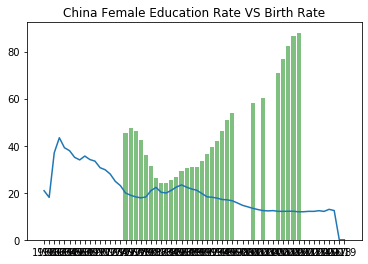

In [23]:
y_CN=femaleData['eduCN']  
y1_CN=femaleData['birthCN']
titleText = ("China Female Education Rate VS Birth Rate")
line_bar(year,y_CN,y1_CN,titleText)


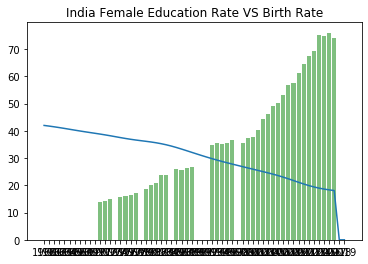

In [24]:
y_IND=femaleData['eduIND']  
y1_IND=femaleData['birthIND']
titleText = ("India Female Education Rate VS Birth Rate")
line_bar(year,y_IND,y1_IND,titleText)

In [25]:
### correlation 
# for Education rate 

corr_CN,_=pearsonr(y_CN, y1_CN)
corr_US,_=pearsonr(y_US, y1_US)
corr_IND,_=pearsonr(y_IND, y1_IND)
print('China Education Pearsons correlation: %.3f' % corr_CN)
print('US Education Pearsons correlation: %.3f' % corr_US)
print('India Education Pearsons correlation: %.3f' % corr_IND)



China Education Pearsons correlation: -0.312
US Education Pearsons correlation: -0.247
India Education Pearsons correlation: -0.585


In [26]:
# for wage level

wage_CN = femaleData['wageCN']  
wage_US = femaleData['wageUS']  
wage_IND= femaleData['wageIND']  

corr_CN_w,_=pearsonr(wage_CN, y1_CN)
corr_US_w,_=pearsonr(wage_US, y1_US)
corr_IND_w,_=pearsonr(wage_IND, y1_IND)

print('China Wage Pearsons correlation: %.3f' % corr_CN_w)
print('US Wage Pearsons correlation: %.3f' % corr_US_w)
print('India Wage Pearsons correlation: %.3f' % corr_IND_w)


China Wage Pearsons correlation: -0.774
US Wage Pearsons correlation: -0.567
India Wage Pearsons correlation: -0.925
